In [1]:
import os

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [2]:
from fastai2.vision.all import *

In [3]:
dblock = DataBlock(get_x = lambda r: f"data/jpeg/train{r['image_name']}",
                  get_y = lambda r : r["target"],)

In [4]:
train_df = pd.read_csv('data/train.csv')

In [5]:
train_df.target.value_counts()

0    32542
1      584
Name: target, dtype: int64

In [6]:
train_df = train_df.sample(n = 1000)

In [7]:
dblock = DataBlock((ImageBlock, MultiCategoryBlock),
                   splitter=RandomSplitter(0.3,42),
                   get_x = lambda r: f"data/jpeg/train/{r['image_name']}.jpg",
                   get_y = lambda r : str(r["target"]),
                   item_tfms = Resize(size=224))


In [8]:
dls = dblock.dataloaders(train_df,bs=128)

In [ ]:
dls.show_batch(nrows=1, ncols=3)

In [46]:
learn = cnn_learner(dls, resnet18)

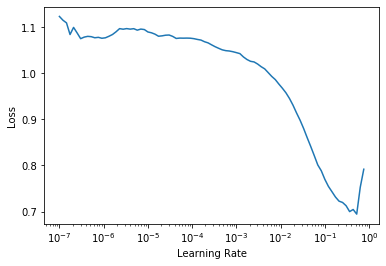

In [65]:
output = learn.lr_find(num_it=100)

In [66]:
print(output)

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.05754399299621582)


In [ ]:
learn.fit_one_cycle(n_epoch=6, lr=5e-2)

In [28]:
learn.save('fit-one-cycle-6-epochs')

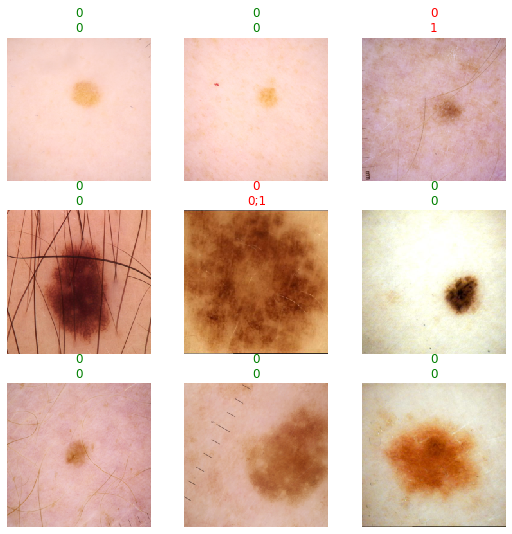

In [32]:
learn.show_results()